In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('Datasets/dataset.csv')

In [24]:
df.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [26]:
df.shape

(3522, 7)

In [27]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [28]:
df.dtypes

Course Name           object
University            object
Difficulty Level      object
Course Rating         object
Course URL            object
Course Description    object
Skills                object
dtype: object

In [29]:
df['Course Rating']=pd.to_numeric(df['Course Rating'],errors='coerce')
df['Difficulty Level']=df['Difficulty Level'].astype('category')
df.dtypes

Course Name             object
University              object
Difficulty Level      category
Course Rating          float64
Course URL              object
Course Description      object
Skills                  object
dtype: object

In [30]:
df.duplicated().sum()

np.int64(98)

In [31]:
df.drop_duplicates(inplace=True)
df.shape

(3424, 7)

In [32]:
df['Course Description']= df['Course Description'].str.replace(r'[^A-Za-z0-9 ,.!?]',' ',regex=True)
df['Course Description']= df['Course Description'].str.lower().str.strip()
df['Course Description']= df['Course Description'].str.replace(r'\s+',' ',regex=True)

df['Skills'] = df['Skills'].str.replace("/", ",").str.lower().str.strip()
df['Skills'] = df['Skills'].str.replace(r'\s*,\s*', ',',regex=True)
df['Skills'] = df['Skills'].str.replace(r',+', ',',regex=True)

In [33]:
df.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"by the end of this guided project, you will be...",finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,this course consists of a general presentation...,chemistry physics solar energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"when it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,in this course you ll learn how to effectively...,data analysis select (sql) database manageme...


In [34]:
df.to_csv("cleaned_dataset.csv",index=False)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Beginner'),
  Text(1, 0, 'Advanced'),
  Text(2, 0, 'Intermediate'),
  Text(3, 0, 'Conversant'),
  Text(4, 0, 'Not Calibrated')])

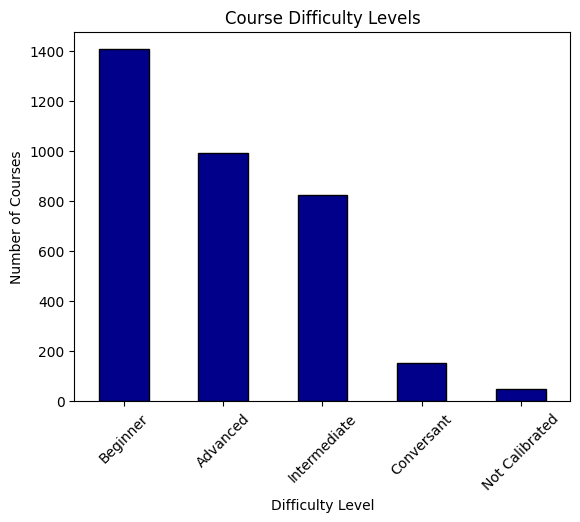

In [36]:
df['Difficulty Level'].value_counts().plot(kind='bar',color='darkblue',edgecolor='black')
plt.title('Course Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)

Text(0, 0.5, 'Number of Courses')

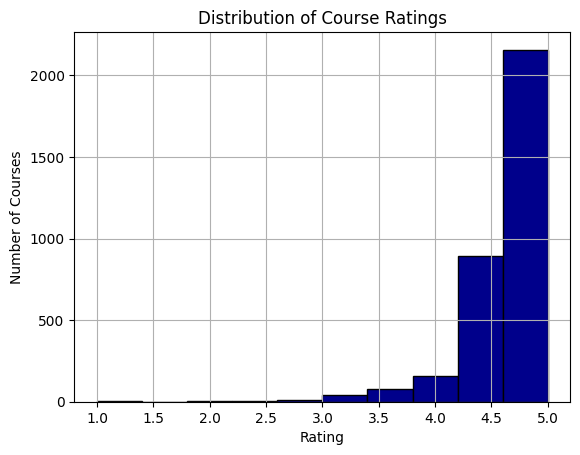

In [37]:
df['Course Rating'].hist(bins=10,color='darkblue',edgecolor='black')
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Courses")

In [38]:

df['Skills_list'] = df['Skills'].str.split(' ')

df_exploded = df.explode('Skills_list')

df_exploded = df_exploded.rename(columns={'Skills_list': 'Skill'})

df_exploded['Skill'] = df_exploded['Skill'].str.strip()


In [39]:
df_exploded.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Skill
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...,drama
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...,
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...,comedy
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...,
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in thi...,drama comedy peering screenwriting film d...,peering


In [40]:
df_exploded['Skill'][df_exploded['Skill'] != ''].value_counts()

Skill
management      1207
business        1107
analysis         958
programming      782
and              763
                ... 
invertible         1
concreteness       1
supremacy          1
racial             1
mhealth            1
Name: count, Length: 4759, dtype: int64

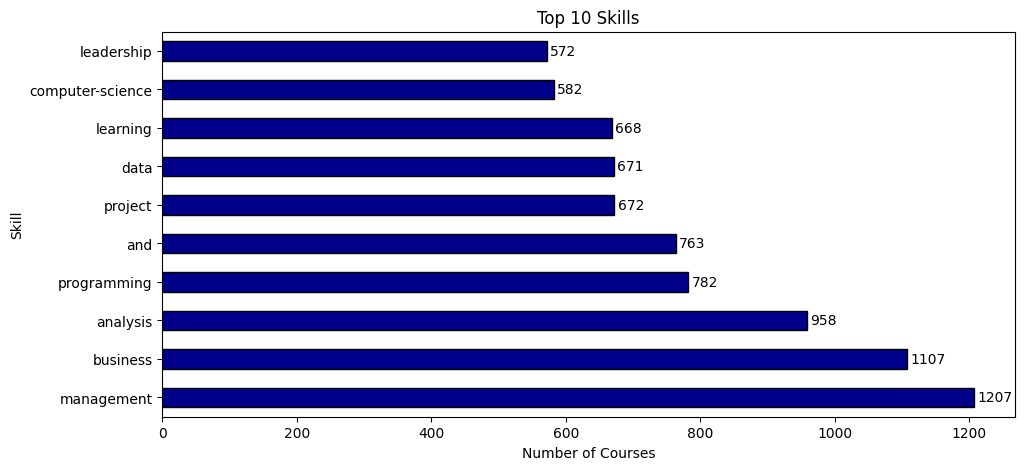

In [41]:
top_10_skills=df_exploded['Skill'][df_exploded['Skill'] != ''].value_counts().head(10)
ax=top_10_skills.plot(kind='barh',color='darkblue',figsize=(11,5),edgecolor='black')
plt.xlabel("Number of Courses")
plt.ylabel("Skill")
plt.title("Top 10 Skills")
for i, v in enumerate(top_10_skills):
    ax.text(v + 5, i, str(v), va='center')